#### Importing Necessary Libraries

In [46]:
%pip install numpy
%pip install pandas
%pip install matplotlib
%pip install seaborn
%pip install scikit-learn
%pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn import linear_model
from sklearn import tree
from sklearn import ensemble
from sklearn import svm
import xgboost
import os

#### Importing the Dataset

In [ ]:
data = pd.read_csv('trafficVolumeData.csv')
data.head()
# data.tail()

,holiday,temp,rain,snow,weather,date,Time,traffic_volume
0,NaN,288.28,0.0,0.0,Clouds,02-10-2012,09:00:00,5545
1,NaN,289.36,0.0,0.0,Clouds,02-10-2012,10:00:00,4516
2,NaN,289.58,0.0,0.0,Clouds,02-10-2012,11:00:00,4767
3,NaN,290.13,0.0,0.0,Clouds,02-10-2012,12:00:00,5026
4,NaN,291.14,0.0,0.0,Clouds,02-10-2012,13:00:00,4918


#### Data Preprocessing

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   holiday         61 non-null     object 
 1   temp            48151 non-null  float64
 2   rain            48202 non-null  float64
 3   snow            48192 non-null  float64
 4   weather         48155 non-null  object 
 5   date            48204 non-null  object 
 6   Time            48204 non-null  object 
 7   traffic_volume  48204 non-null  int64  
dtypes: float64(3), int64(1), object(4)
memory usage: 2.9+ MB


In [50]:
data.describe()

,temp,rain,snow,traffic_volume
count,48151.000000,48202.000000,48192.000000,48204.000000
mean,281.205351,0.334278,0.000222,3259.818355
std,13.343675,44.790062,0.008169,1986.860670
min,0.000000,0.000000,0.000000,0.000000
25%,272.160000,0.000000,0.000000,1193.000000
50%,282.460000,0.000000,0.000000,3380.000000
75%,291.810000,0.000000,0.000000,4933.000000
max,310.070000,9831.300000,0.510000,7280.000000


#### Handling null values

In [51]:
data.isnull().any()

holiday            True
temp               True
rain               True
snow               True
weather            True
date              False
Time              False
traffic_volume    False
dtype: bool

In [52]:
data.isnull().sum()

holiday           48143
temp                 53
rain                  2
snow                 12
weather              49
date                  0
Time                  0
traffic_volume        0
dtype: int64

There are null values in the columns _temp, rain, snow_ and _weather_. _Temp, rain_ and _snow_ are float values. Hence we can replace them with mean values.

In [53]:
data["temp"] = data["temp"].fillna(data["temp"].mean())
data["rain"] = data["rain"].fillna(data["rain"].mean())
data["snow"] = data["snow"].fillna(data["snow"].mean())
data["weather"] = data["weather"].fillna(data["weather"].mode()[0])

data.isnull().sum()

holiday           48143
temp                  0
rain                  0
snow                  0
weather               0
date                  0
Time                  0
traffic_volume        0
dtype: int64

Now, there are no null values.

#### Splitting Date and Time column

In [54]:
data[["Day", "Month", "Year"]] = data["date"].str.split("-", expand = True)
data[["Hours", "Minutes", "Seconds"]] = data["Time"].str.split(":", expand = True)
data.drop(columns = ["date", "Time"], axis = 1, inplace = True)

data.head()

,holiday,temp,rain,snow,weather,traffic_volume,Day,Month,Year,Hours,Minutes,Seconds
0,NaN,288.28,0.0,0.0,Clouds,5545,02,10,2012,09,00,00
1,NaN,289.36,0.0,0.0,Clouds,4516,02,10,2012,10,00,00
2,NaN,289.58,0.0,0.0,Clouds,4767,02,10,2012,11,00,00
3,NaN,290.13,0.0,0.0,Clouds,5026,02,10,2012,12,00,00
4,NaN,291.14,0.0,0.0,Clouds,4918,02,10,2012,13,00,00


#### Checking Descriptive Statistics

In [55]:
data.describe()

,temp,rain,snow,traffic_volume
count,48204.000000,48204.000000,48204.000000,48204.000000
mean,281.205351,0.334278,0.000222,3259.818355
std,13.336338,44.789133,0.008168,1986.860670
min,0.000000,0.000000,0.000000,0.000000
25%,272.180000,0.000000,0.000000,1193.000000
50%,282.429000,0.000000,0.000000,3380.000000
75%,291.800000,0.000000,0.000000,4933.000000
max,310.070000,9831.300000,0.510000,7280.000000


#### Checking Correlation

In [ ]:
numeric_data = data.select_dtypes(include='number')  # Select only numeric columns
corr = numeric_data.corr()
corr

,temp,rain,snow,traffic_volume
temp,1.000000,0.009070,-0.019758,0.130034
rain,0.009070,1.000000,-0.000090,0.004714
snow,-0.019758,-0.000090,1.000000,0.000735
traffic_volume,0.130034,0.004714,0.000735,1.000000


<Axes: >

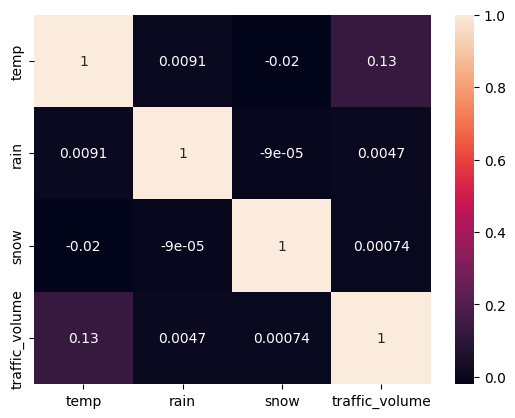

In [57]:
sns.heatmap(corr, annot = True)

### Exploratory Data Analysis

#### Univariate Analysis

<Axes: xlabel='weather', ylabel='Count'>

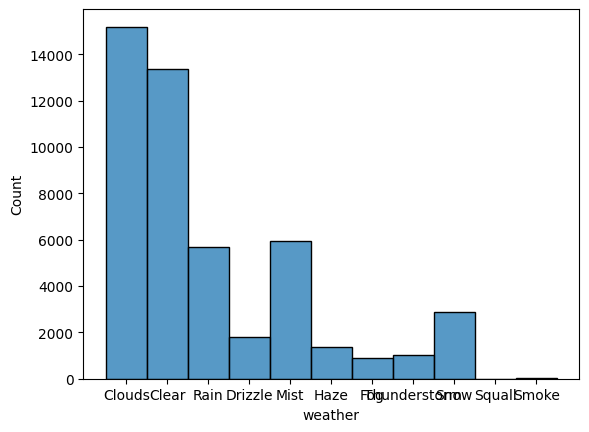

In [19]:
sns.histplot(data["weather"])

#### Bivariate Analysis

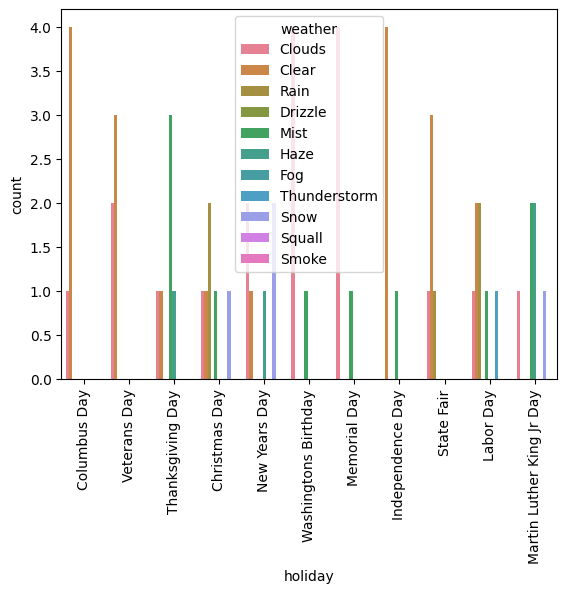

In [20]:
sns.countplot(x = "holiday", data = data, hue = data["weather"], orient = 'h')

plt.xticks(rotation=90)
plt.show()

In [21]:
data.holiday.value_counts()

holiday
Labor Day                    7
Christmas Day                6
Thanksgiving Day             6
Martin Luther King Jr Day    6
New Years Day                6
Veterans Day                 5
Columbus Day                 5
Memorial Day                 5
Washingtons Birthday         5
State Fair                   5
Independence Day             5
Name: count, dtype: int64

In [22]:
data.temp.max()
# data.temp.min()

np.float64(310.07)

In [23]:
data.rain.max()

np.float64(9831.3)

#### Multivariate Analysis

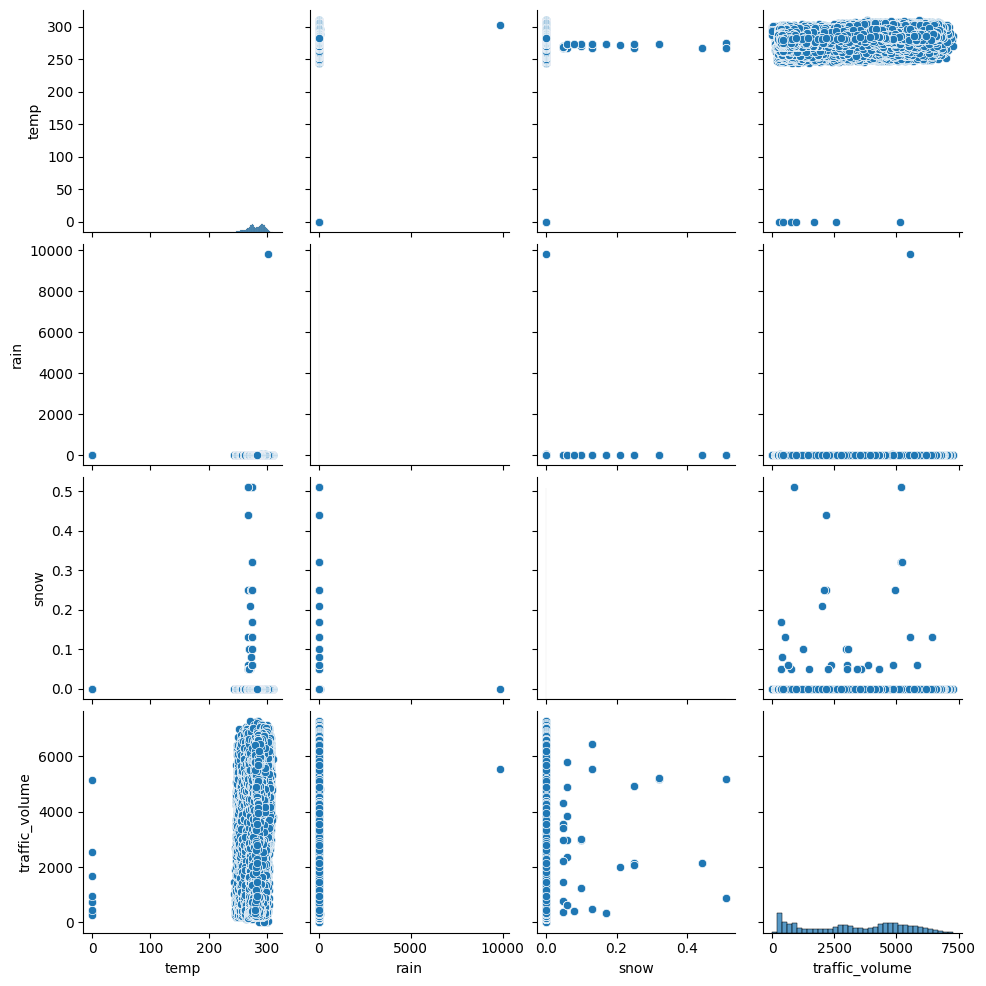

In [24]:
sns.pairplot(data)

<Axes: >

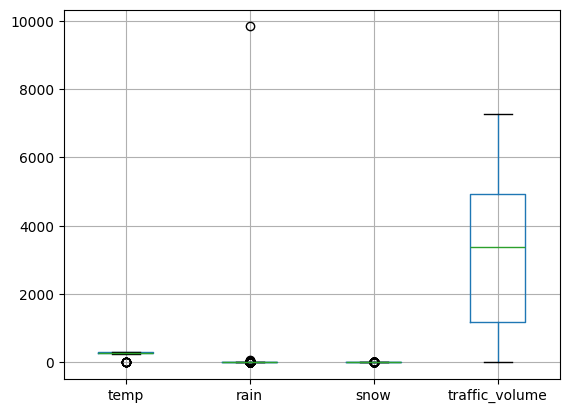

In [25]:
data.boxplot()

There are no outliers in the given dataset.

### Splitting the data into X and Y

In [26]:
y = data["traffic_volume"]
x = data.drop(columns = ["traffic_volume"], axis = 1)

names = x.columns

In [27]:
y.shape

(48204,)

### Feature Scaling

In [28]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

x["weather"] = LE.fit_transform(x["weather"])
x["holiday"] = LE.fit_transform(x["holiday"])

from sklearn.preprocessing import MinMaxScaler
MS = MinMaxScaler()

x_Scaled = pd.DataFrame(MS.fit_transform(x), columns = x.columns)
x_Scaled.head()

,holiday,temp,rain,snow,weather,Day,Month,Year,Hours,Minutes,Seconds
0,1.0,0.929726,0.0,0.0,0.1,0.033333,0.818182,0.0,0.391304,0.0,0.0
1,1.0,0.933209,0.0,0.0,0.1,0.033333,0.818182,0.0,0.434783,0.0,0.0
2,1.0,0.933918,0.0,0.0,0.1,0.033333,0.818182,0.0,0.478261,0.0,0.0
3,1.0,0.935692,0.0,0.0,0.1,0.033333,0.818182,0.0,0.521739,0.0,0.0
4,1.0,0.938949,0.0,0.0,0.1,0.033333,0.818182,0.0,0.565217,0.0,0.0


### Splitting the data into Train and Test set

In [29]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_Scaled, y, test_size = 0.2, random_state = 0)
print("Shape of x_train:", x_train.shape)
print("Shape of x_test:", x_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of x_train: (38563, 11)
Shape of x_test: (9641, 11)
Shape of y_train: (38563,)
Shape of y_test: (9641,)


### Model Building

#### Training the Model

In [30]:
lin_reg = linear_model.LinearRegression()
Dtree = tree.DecisionTreeRegressor()
Rand = ensemble.RandomForestRegressor()
svr = svm.SVR()
XGB = xgboost.XGBRegressor()

lin_reg.fit(x_train, y_train)
Dtree.fit(x_train, y_train)
Rand.fit(x_train, y_train)
svr.fit(x_train, y_train)
XGB.fit(x_train, y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


### Performance Testing and Hyperparameter Tuning

#### Testing model with multiple evaluation metrics

In [31]:
p1 = lin_reg.predict(x_train)  #linear regression
p2 = Dtree.predict(x_train)  #decision tree
p3 = Rand.predict(x_train)   #random forest
p4 = svr.predict(x_train)    #support Vector regression
p5 = XGB.predict(x_train)    #Extreme Gradient Boosting Algorithm

In [32]:
p6 = lin_reg.predict(x_test)  #linear regression
p7 = Dtree.predict(x_test)    #Decision tree
p8 = Rand.predict(x_test)     #Random Forest
p9 = svr.predict(x_test)      #support Vector regression
p10 = XGB.predict(x_test)     #Extreme Gradient Boosting Algorithm

### Evaluating All models

#### R - squared score

In [33]:
from sklearn import metrics
print(metrics.r2_score(p1, y_train))
print(metrics.r2_score(p2, y_train))
print(metrics.r2_score(p3, y_train))
print(metrics.r2_score(p4, y_train))
print(metrics.r2_score(p5, y_train))

-5.501515909731947
1.0
0.9748085417291977
-24.65035572723688
0.8463600277900696


In [34]:
print(metrics.r2_score(p6, y_test))
print(metrics.r2_score(p7, y_test))
print(metrics.r2_score(p8, y_test))
print(metrics.r2_score(p9, y_test))
print(metrics.r2_score(p10, y_test))

-5.36581796477335
0.6930469734214405
0.8020742402954159
-24.36346938774117
0.8047677278518677


#### Evaluating Metrics for Random Forest Regressor

In [35]:
import sklearn.metrics as metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print('R square score on train set and test set are :', Rand.score(x_train, y_train), Rand.score(x_test, y_test))
print('Root mean squared error :', np.sqrt(mean_squared_error(y_test, Rand.predict(x_test))))
print('Mean absolute error :', mean_absolute_error(y_test, Rand.predict(x_test)))

R square score on train set and test set are : 0.9773756353365904 0.8358488464597578
Root mean squared error : 801.2217511822848
Mean absolute error : 506.8884213255886


#### Hyperparameter Tuning

In [36]:
from sklearn.model_selection import GridSearchCV

parameter_grid ={'max_depth':np.arange(1,25),'n_estimators':np.arange(1,25)}
grid_search = GridSearchCV(Rand, parameter_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(x_train, y_train)
grid_search.best_params_

{'max_depth': np.int64(24), 'n_estimators': np.int64(24)}

In [37]:
from sklearn.ensemble import RandomForestRegressor
HRF = RandomForestRegressor(max_depth=23, n_estimators=24, random_state=1231)
HRF.fit(x_train, y_train)

,n_estimators,24
,criterion,'squared_error'
,max_depth,23
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [38]:
print('R square score on train set and test set are :',HRF.score(x_train, y_train),HRF.score(x_test, y_test))
print('Root mean squared error :',np.sqrt(mean_squared_error(y_test,HRF.predict(x_test))))
print('Mean absolute error :',mean_absolute_error(y_test, HRF.predict(x_test)))

R square score on train set and test set are : 0.9642571063781897 0.8284810424657214
Root mean squared error : 819.0055137022869
Mean absolute error : 516.6137319871473


In [39]:
from sklearn.decomposition import PCA
pca = PCA(.90)
pca.fit(x_train)

,n_components,0.9
,copy,True
,whiten,False
,svd_solver,'auto'
,tol,0.0
,iterated_power,'auto'
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,None


In [40]:
x_train.shape

(38563, 11)

In [41]:
pca.n_components_

np.int64(5)

In [42]:
PCA_X_train = pca.transform(x_train)
PCA_X_test = pca.transform(x_test)

In [43]:
RF_PCA = RandomForestRegressor()
RF_PCA.fit(PCA_X_train,y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [44]:
print('R square score on train set and test set are :', RF_PCA.score(PCA_X_train, y_train),RF_PCA.score(PCA_X_test, y_test))
print('Root mean squared error :', np.sqrt(mean_squared_error(y_test,RF_PCA.predict(PCA_X_test))))
print('Mean absolute error :', mean_absolute_error(y_test, RF_PCA.predict(PCA_X_test)))

R square score on train set and test set are : 0.9720018670495241 0.8045406062826214
Root mean squared error : 874.2970941758871
Mean absolute error : 589.0418182761124


### Model Deployment

#### Saving the model

In [45]:
import pickle
pickle.dump(Rand, open("model.pkl", 'wb'))
# pickle.dump(LE, open("encoder.pkl", 'wb'))
pickle.dump(MS, open("scaler.pkl", 'wb'))
# pickle.dump(HRF, open("HRF_Model.pkl", 'wb'))
# pickle.dump(RF_PCA, open("RF_PCA_Model.pkl", 'wb'))
# pickle.dump(pca, open("PCA.pkl", 'wb'))